## Import useful libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
netflix = pd.read_csv("netflix_titles_nov_2019.csv")

## Understanding the data

In [6]:

netflix.shape

(5837, 12)

In [7]:
netflix.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [30]:
#for checking data type
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [26]:
netflix.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [27]:
netflix.duplicated().sum()

0

In [28]:
netflix.corr()
# bcz only two columns have numeric data

,show_id,release_year
show_id,1.000000,0.536742
release_year,0.536742,1.000000


In [29]:
netflix.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [32]:
#CHecking for null values
netflix.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

### Working on Null values 

**Total five columns (director, cast, country, rating and date_added) have Null values, but out of 5 columns four (director, cast, country and date_added) columns have lot of null values**

**According to our task we don't need above four columns who have null values, so we caan ignore it or drop it from data or encod it**

**I analyse that in rating column, one of type is UR(Un Recognise), so i replase null values of rating which is total 10 with UR, bcz "UR" similar to null values**

**I make a copy of original data, and do some chamges in copy data**

In [17]:
#make a copy of dataset
netflix1 = netflix.copy()

In [19]:
#Replacing Null values of Rating collumn with UR
netflix1['rating'].fillna('UR', inplace=True)

In [22]:
netflix1.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating             0
duration           0
listed_in          0
description        0
type               0
dtype: int64

###  **As above now we have null valuse in four columns, and that all columns who have null data are not needed for our task so no need any action for this**

## 1: Plot a graph showing number of contents on Netflix based on Rating.

In [24]:
netflix1['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

Text(0.5, 1.0, 'Relation between Type of content (TV SHow, Movie) & Rating')

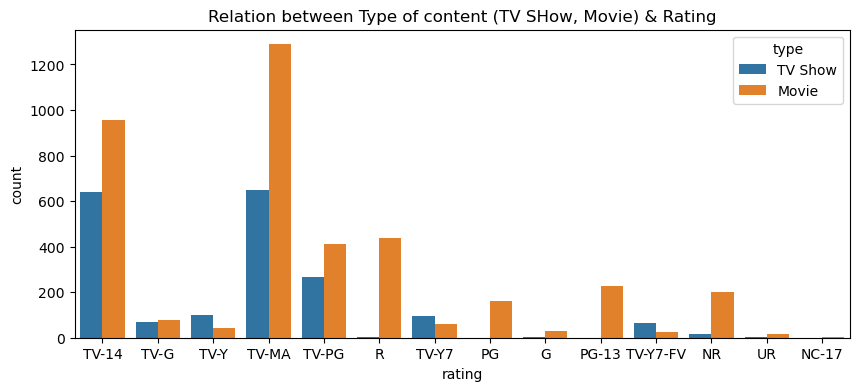

In [33]:
plt.figure(figsize=(10,4))
sns.countplot(x='rating',hue='type',data=netflix1)
plt.title('Relation between Type of content (TV SHow, Movie) & Rating')


## 2: Plot a graph showing the number of TV Shows and Movies across different type of Rating

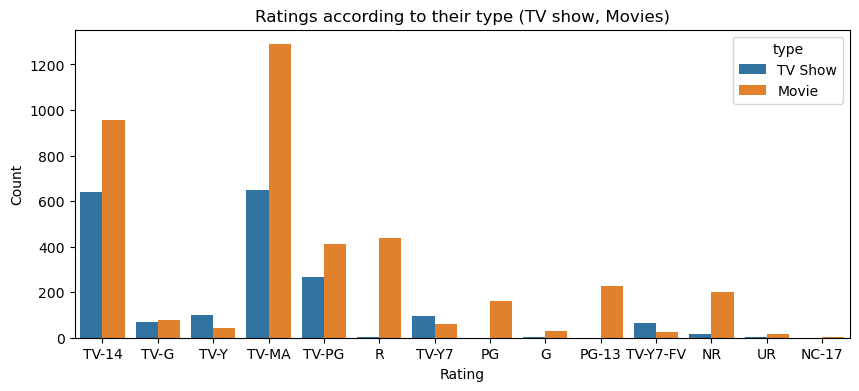

In [64]:
plt.figure(figsize=(10,4))
A = sns.countplot(x="rating", hue="type", data=netflix1,)

plt.title("Ratings according to their type (TV show, Movies)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## 3: Compare India, US, Japan, Spain, UK & Canada to check which country produces highest TV Show and Movies.

**In this case country column we use and country column also have many null values but in given task we need to compare with particular given countries name, so no need to replcae data or drop data**

In [61]:
#countries = netflix1[netflix1["country"].isin(["India", "United States", "Japan", "Spain", "United Kingdom", "Canada"])]

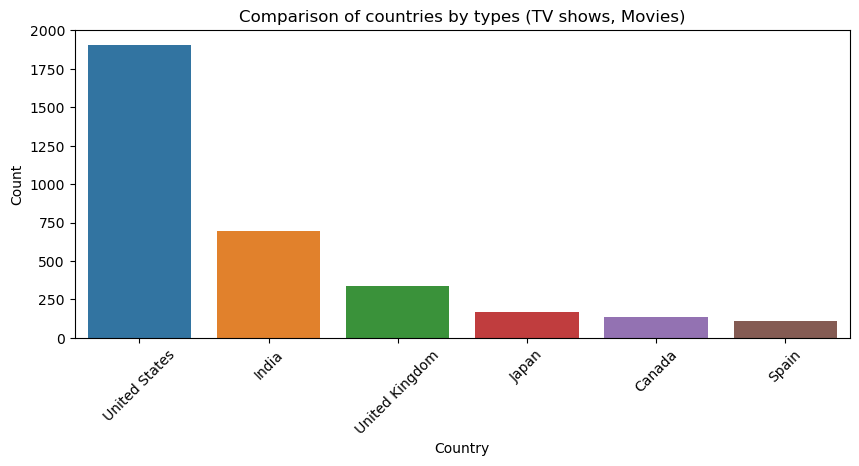

In [63]:
plt.figure(figsize=(10, 4))
countries = ['India', 'United States', 'Japan', 'Spain', 'United Kingdom', 'Canada']
counts = netflix1[netflix1['country'].isin(countries)]['country'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Comparison of countries by types (TV shows, Movies)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4: Plot a graph showing the number of TV Shows and Movies added to Netflix every year.

In [65]:
#netflix1['release_year'].value_counts()

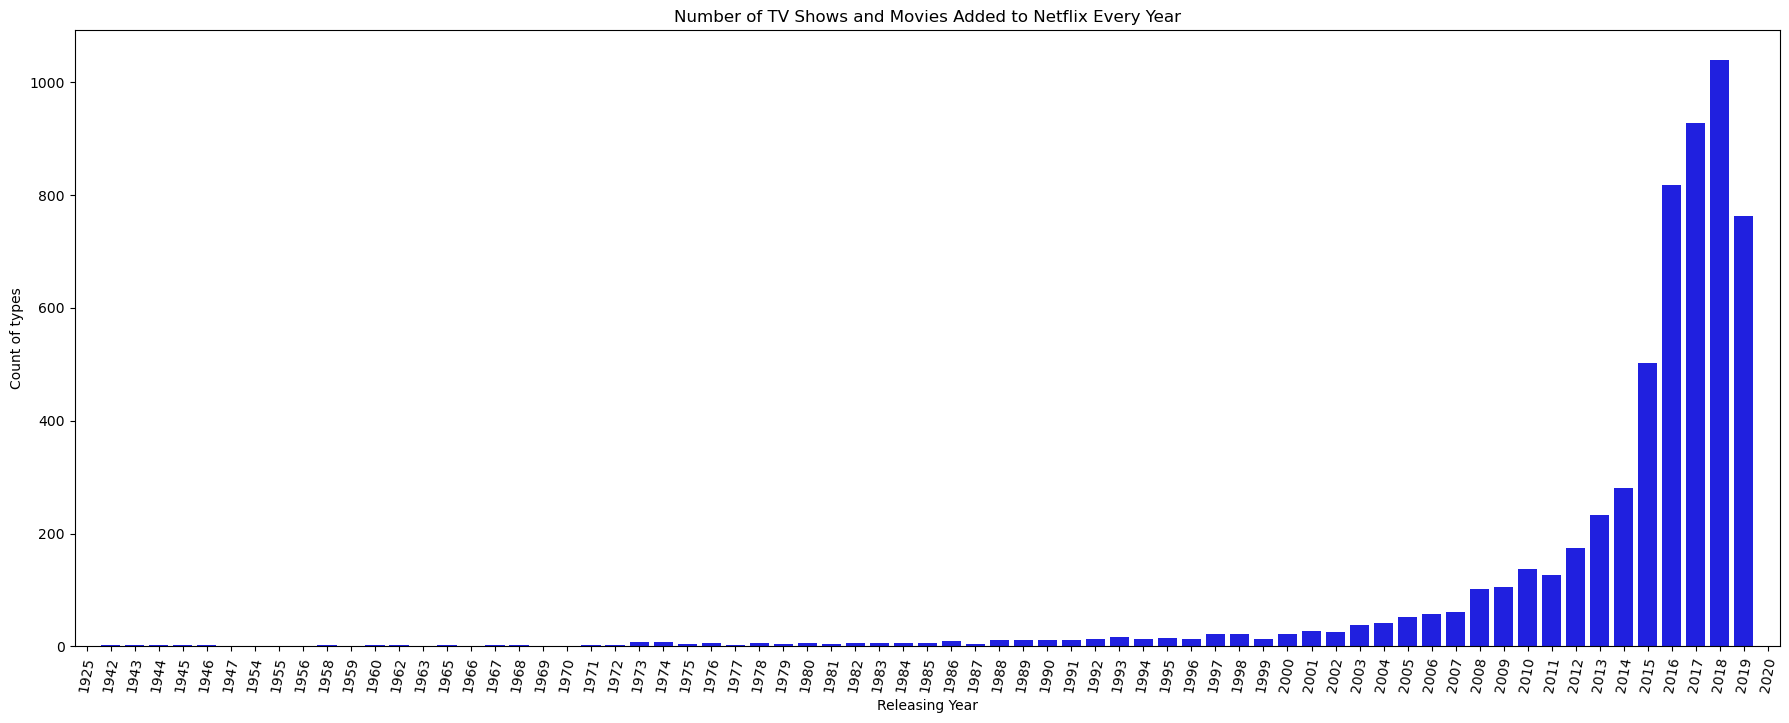

In [74]:
plt.figure(figsize=(22, 8))
total_year = netflix1['release_year'].value_counts().sort_index()
sns.barplot(x=total_year.index, y=total_year.values, color = "b")
plt.title('Number of TV Shows and Movies Added to Netflix Every Year')
plt.xlabel('Releasing Year')
plt.ylabel('Count of types')
plt.xticks(rotation=80)
plt.show()

## 5: In 2019, Find out if Netflix has added more TV Shows or Movies to their platform and represent the same visually.


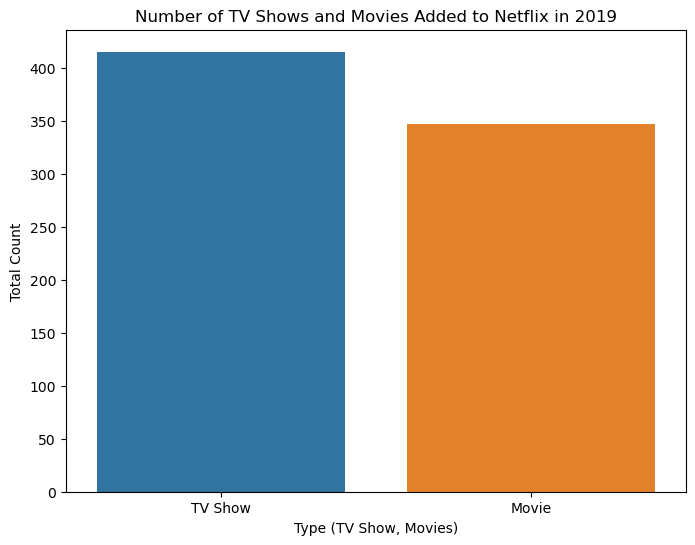

In [78]:
netflix1_2019 = netflix1[netflix1['release_year'] == 2019]
year_2019 = netflix1_2019['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=year_2019.index, y=year_2019.values)
plt.title('Number of TV Shows and Movies Added to Netflix in 2019')
plt.xlabel('Type (TV Show, Movies)')
plt.ylabel('Total Count')
plt.show()